## Quiz #0401

### "Optimal number of clusters for K-means clustering"

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
%matplotlib inline

#### Answer the following question by providing Python code:

In [36]:
# We will use simulated data.
# 3 clusters in 8 dimensional space.
# Hard to visualize!
X, label = make_blobs(n_samples=150, n_features=8, centers=3, cluster_std = 2, random_state=123)

(150,)

1). Define a function that calculates the "total internal sum of squares".
- X         :   Data.
- centers   :   Array that contains the centroid coordinates. Calculated by kmeans.
- clusters  :   Array of cluster labels. Calculated by kmeans. <br> <br>
HINT: Implement the formula from the lecture note.

In [46]:
def total_internal_ss(X, centers, clusters):
    N_clusters = centers.shape[0]
    N_columns = centers.shape[1]
    N_rows = X.shape[0]
    # <Your code goes in here>
    sum_squares=0
    for i in range(N_rows) : 
        distance=0
        distance+=(np.linalg.norm(centers[clusters[i]]-X[i])**2) 
        sum_squares+=distance
    return sum_squares

2). Visualize as a Scatter plot the "total internal sum of squares" vs N# of clusters. 
- Then, determine the optimal number of clusters.
- Is this number the same as expected?

In [135]:
n_cluster = np.array(range(2,10))                   # Array that contains the number of clusters.
total_ss = np.array([])                             # Array that will contain the total internal sum of squares.
      
       # <Your code goes in here>
plt.scatter(x=n_cluster,y=total_ss)

In [136]:
       # <Your code goes in here>
from sklearn.cluster import KMeans
for i in n_cluster : 
    kmeans= KMeans(n_clusters=i) 
    kmeans.fit(X)
    centers = kmeans.cluster_centers_
    total_ss=np.append(total_ss,total_internal_ss(X,centers,kmeans.labels_))
total_ss

array([10921.71272404,  4665.30132239,  4419.13883239,  4229.80406881,
        4001.92472191,  3827.53797203,  3657.12315894,  3582.70551776])

Text(0, 0.5, 'Total internal sum of squares')

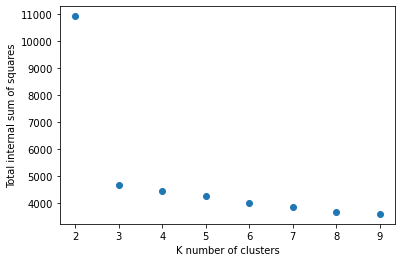

In [140]:
plt.scatter(x=n_cluster,y=total_ss)
plt.xlabel("K number of clusters")
plt.ylabel("Total internal sum of squares")

Using the elbow method, the optimal number of clusters is k=3 (We see from the plot that the point correspoding to k=3 is the point of inflection, choosing a k>3 does not worth the gain on the total internal sum of squares and can lead to overfitting)<br>
Yes, the number is the same as expected because when we created the data using make_blobs, we specified the number of centers to be 3